# Part 1 -- Intro


Load the tips dataset from seaborn


In [27]:
import seaborn as sns # type: ignore
import numpy as np

tips = sns.load_dataset('tips')
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Filter rows by `smoker == 'No'` and `total_bill >= 10`


In [28]:
tips.loc[(tips['smoker']== 'No') & (tips['total_bill']>= 10)]


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


### What is the average `total_bill` for each value of `smoker`, `day`, and `time`


In [29]:
tips.groupby(['smoker','day','time'])['total_bill'].agg(np.mean)


C:\Users\Home\AppData\Local\Temp\ipykernel_4264\3580363783.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['smoker','day','time'])['total_bill'].agg(np.mean)
C:\Users\Home\AppData\Local\Temp\ipykernel_4264\3580363783.py:1: FutureWarning: The provided callable <function mean at 0x000002422F07C0E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tips.groupby(['smoker','day','time'])['total_bill'].agg(np.mean)


smoker  day   time  
Yes     Thur  Lunch     19.190588
              Dinner          NaN
        Fri   Lunch     12.323333
              Dinner    19.806667
        Sat   Lunch           NaN
              Dinner    21.276667
        Sun   Lunch           NaN
              Dinner    24.120000
No      Thur  Lunch     17.075227
              Dinner    18.780000
        Fri   Lunch     15.980000
              Dinner    19.233333
        Sat   Lunch           NaN
              Dinner    19.661778
        Sun   Lunch           NaN
              Dinner    20.506667
Name: total_bill, dtype: float64

# Part 2 -- Tidy


Taken from the r4ds "Tidy Data" Chapter: https://r4ds.had.co.nz/exploratory-data-analysis.html


In [30]:
import pandas as pd


In [31]:
tbl1 = pd.read_csv('./data/table1.csv')


In [32]:
tbl2 = pd.read_csv('./data/table2.csv')


In [33]:
tbl3 = pd.read_csv('./data/table3.csv')


In [34]:
tbl1


,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Tidy the `tbl2` dataset


In [35]:
tbl2


,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [36]:
tbl2.pivot_table(index=['country','year'],
                 columns='type',
                 values='count').reset_index()


type,country,year,cases,population
0,Afghanistan,1999,745.0,1.998707e+07
1,Afghanistan,2000,2666.0,2.059536e+07
2,Brazil,1999,37737.0,1.720064e+08
3,Brazil,2000,80488.0,1.745049e+08
4,China,1999,212258.0,1.272915e+09
5,China,2000,213766.0,1.280429e+09


### Tidy the `tbl3` dataset


In [37]:
# just give me the population
tbl3


,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [38]:
tbl3_split= tbl3['rate'].str.split('/', expand=True)


In [39]:
tbl3[['rate_split', 'population']] = tbl3_split
# tbl3.drop(['number'], axis='columns', inplace=True)
tbl3


,country,year,rate,rate_split,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272
5,China,2000,213766/1280428583,213766,1280428583


In [40]:
#another method
pop = tbl3['rate'].str.split('/').str.get(1)
pop


0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: object

# Part 3 -- Apply functions


Look at the `table3` dataset


In [41]:
tbl3 = pd.read_csv('./data/table3.csv')
tbl3


,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


### Write a function that takes a value of `rate` and parses out the total population.


In [42]:
tbl3.dtypes
tbl3['rate']


0         745/19987071
1        2666/20595360
2      37737/172006362
3      80488/174504898
4    212258/1272915272
5    213766/1280428583
Name: rate, dtype: object

In [43]:
def extract_pop(rate, delim='/', position=1):
    return int(rate.split(delim)[position])


In [44]:
assert extract_pop('123/546678') == 546678


In [45]:
tbl3['rate'].apply(extract_pop)


0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: int64

### Set the population to a new column


In [46]:
tbl3['population'] = tbl3['rate'].apply(extract_pop)
tbl3


,country,year,rate,population
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


# Part 4 -- Plots


In [47]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [48]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Create a figure with 2 axes

### distplot of `fare` in one axes

### boxplot of `class` and `fare` on the other axes


C:\Users\Home\AppData\Local\Temp\ipykernel_4264\174203508.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.fare, ax=ax1)


<Axes: xlabel='class', ylabel='fare'>

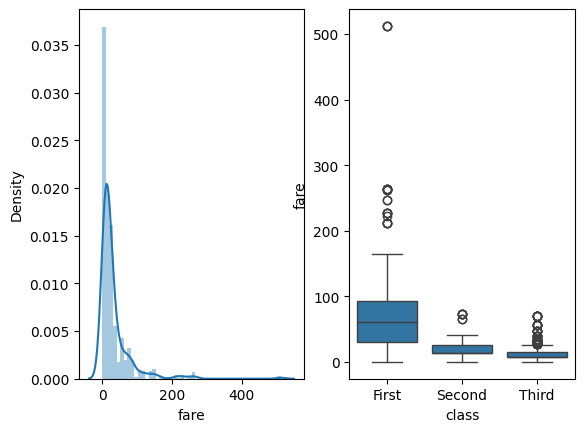

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(titanic.fare, ax=ax1)
sns.boxplot(x='class', y='fare', data=titanic)


# Part 5 -- Models


In [50]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Subset `survived`, `class`, `who`


In [52]:
titanic_subset = titanic[['survived','pclass', 'who']]
titanic_subset.head()


,survived,pclass,who
0,0,3,man
1,1,1,woman
2,1,3,woman
3,1,1,woman
4,0,3,man


### Create dummy encoded dataset


In [53]:
import pandas as pd

titanic_dummy = pd.get_dummies(titanic_subset, drop_first=True)
titanic_dummy.head()


,survived,pclass,who_man,who_woman
0,0,3,True,False
1,1,1,False,True
2,1,3,False,True
3,1,1,False,True
4,0,3,True,False


### Fit a logistic regression on `survived`


In [54]:
from sklearn.linear_model import LogisticRegression


In [55]:
X = titanic_dummy.iloc[:,1:]
X


,pclass,who_man,who_woman
0,3,True,False
1,1,False,True
2,3,False,True
3,1,False,True
4,3,True,False
...,...,...,...
886,2,True,False
887,1,False,True
888,3,False,True
889,1,True,False


In [56]:
y = titanic_dummy.survived


In [57]:
lr = LogisticRegression()


In [58]:
lr.fit(X=X,y=y)


LogisticRegression()

In [59]:
lr.coef_


array([[-1.03297223, -2.41736729,  0.44947345]])

In [60]:
lr.intercept_


array([3.02983019])